In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import pickle
import os
import re
import seaborn as sns
from sklearn import metrics

import visualizations

In [2]:
def attention_single_file(filename):
    with open(filename, 'rb') as file_:
        result = pickle.load(file_)
    return result

In [3]:
def prediction_filenames(dirname):
    return [run_prediction for run_prediction in os.listdir(dirname)
            if os.path.isfile(os.path.join(dirname, run_prediction)) and 'predictions' in run_prediction]

In [4]:
def labels_single_file(filename):
    result = pandas.read_csv(filename, sep='\t')
    return result

## Paso 1

Corregir el path a los resultados y el nombre de los archivos

In [5]:
classifier = '19-10-14-02-22'
results_path = '../../results/essays2/claim_detection/paragraph/{classifier}/'.format(
        classifier=classifier)
dataset = 'dev'
attention_file_name = 'attention_essays2_claim_detection_essays2_claim_detection_{}.p'.format(dataset)
predictions_file_name = 'predictions_essays2_claim_detection_essays2_claim_detection_{}.conll'.format(dataset)

## Paso 2

Fix the name of the dataset

In [6]:
att_matrix = attention_single_file(results_path + attention_file_name)
prediction = labels_single_file(results_path + predictions_file_name)

In [7]:
dataset_name = list(att_matrix.keys())[0]

In [9]:
prediction.loc[:,'Attention Score'] = numpy.abs(numpy.concatenate(att_matrix[dataset_name]))
prediction.loc[:, 'Correct'] = (prediction.Predicted == prediction['True'])

/home/mteruel/anaconda2/envs/env35/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


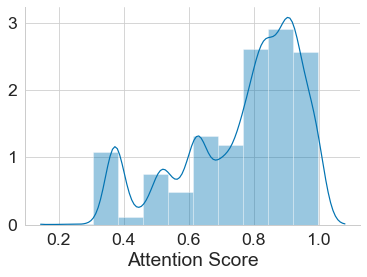

In [10]:
sns.distplot(prediction['Attention Score'], bins=10)
sns.despine()

In [11]:
prediction['Attention Score'].describe()

count    14767.000000
mean         0.766676
std          0.180697
min          0.227948
25%          0.633004
50%          0.822291
75%          0.906962
max          0.997117
Name: Attention Score, dtype: float64

In [13]:
prediction[prediction.Sentence == 34][20:45]

,Token,True,Predicted,Sentence,Attention Score,Correct
2339,the,O,O,34,0.378818,True
2340,world,O,O,34,0.872357,True
2341,",",O,O,34,0.906962,True
2342,such,O,O,34,0.710705,True
2343,as,O,O,34,0.801481,True
2344,the,O,O,34,0.378818,True
2345,most,O,O,34,0.903876,True
2346,popular,O,O,34,0.823056,True
2347,shoes,O,O,34,0.848554,True
2348,style,O,O,34,0.738159,True


In [14]:
import json

In [61]:
json_words = json.dumps(
    prediction[['Token', 'Attention Score', 'Sentence', 'Predicted', 'Correct']].values.tolist()[2359:2500]
)

In [62]:
json_words[:300]

'[["However", 0.9836567640304565, 34, "O", true], [",", 0.9069620966911316, 34, "O", true], ["some", 0.6513687372207642, 34, "O", true], ["people", 0.8262598514556885, 34, "O", true], ["think", 0.962137758731842, 34, "O", true], ["that", 0.9383944869041443, 34, "O", true], ["dressing", 0.788604736328'

How to run D3 on Jupyter

It is still a mistery, and sometimes it does not work, but this worked https://blog.thedataincubator.com/2015/08/embedding-d3-in-an-ipython-notebook/


In [17]:
from IPython.core.display import display, HTML
from string import Template
import json

In [18]:
HTML('<script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.16/d3.min.js"></script>')

In [19]:
HTML('<script src="https://d3js.org/d3-color.v1.min.js"></script>')

In [20]:
HTML('<script src="https://d3js.org/d3-interpolate.v1.min.js"></script>')

In [49]:
HTML('<script src="https://d3js.org/d3-scale-chromatic.v1.js"></script>')

In [41]:
HTML('<script src="textChart.js"></script>')

In [42]:
HTML("""<script>
if (d3 === undefined) {
    alert('No d3 library');
}
if (TextChart === undefined) {
    alert('No Chart library');
}
</script>""")

In [48]:
%%javascript
require.config({
    paths: { 
        d3: 'https://d3js.org/d3.v5.min',
        'd3-scale-chromatic': "https://d3js.org/d3-scale-chromatic.v1.js"
    }
});

<IPython.core.display.Javascript object>

In [43]:
json_words[1000:1080]

'["for", 0.622525691986084, 1, "O", false], ["extended", 0.6259775757789612, 1, "'

In [63]:
js_text_template = Template("""
var nouns = JSON.parse('$json_data');

opts = {
  lineHeight: 16,
  width: 900,
  height: 600,
  linePadding: 10,
  useColor: false,
  labelColors: {
    'B-Claim': '#FF5964',
    'I-Claim': '#FF5964',
    'B-Premise': '#35A7FF',  // blue
    'I-Premise': '#35A7FF',
    'O': '#AAAAAA'
  }
}
chart = new TextChart(nouns, opts);
chart.draw('text-container');
""")

html_template = Template("""
    <div id='text-container'></div>
    <script src="textChart.js"></script>
    <script>$js_text</script>
""")

js_text = js_text_template.substitute({
    'json_data': json_words.replace("'", "\\'")
})

HTML(html_template.substitute({'js_text': js_text}))

In [64]:
att_words = prediction[prediction['Attention Score'] > 0.967].Token.unique()
attentions_big = [prediction[prediction.Token == x]['Attention Score'].iloc[0] for x in att_words]
att_list = [(y, x) for y, x in reversed(sorted(zip(attentions_big, att_words)))]
for att, word in att_list:
    print(int((att-min(attentions_big))*550), word)

16 .
14 Because
14 Reasons
14 Furthermore
13 Successful
12 Nevertheless
12 ?
12 Despite
11 Fatherhood
11 Obviously
10 because
10 Just
10 blame
9 Nonetheless
9 Regardless
9 Fossil
9 However
8 believe
8 U.S
8 Apparently
8 conclusion
8 He
8 I
8 assume
8 Personally
7 Research
7 favour
7 favor
7 Yet
7 Benefits
6 Academic
6 Taxes
6 suppose
6 approve
6 Admittedly
6 Firstly
6 Whatsapp
6 burden
6 Thus
5 aware
5 Friday
5 opinion
5 balance
5 Museums
5 My
5 Hence
5 discuss
5 Moreover
4 Indeed
4 So
4 Young
4 focus
4 Undoubtedly
4 Therefore
4 absolutely
4 We
4 Law
4 Star
4 critical
4 Wealth
4 War
4 If
4 conclude
4 accept
3 drawbacks
3 sure
3 Perhaps
3 Health
3 doubt
3 Researches
3 Reading
3 argue
3 State
3 cause
3 Maybe
3 Economic
3 Labor
2 complain
2 Consider
2 ;
2 That
2 credibility
2 But
2 What
2 Preserving
2 Never
2 Pedro
2 Although
2 belief
2 Secondly
2 saying
1 account
1 outcome
1 Raising
1 facts
1 Consequently
1 bad
1 idea
1 Government
1 Kevin
1 Intrinsic
1 CO2
1 Biodiversity
1 succeed
1 stat